---
execute:
  cache: false
  eval: true
  echo: true
  warning: false
  keep-ipynb: true
---


# Multi-dimensional Functions {#sec-multi-dim}


This chapter illustrates how high-dimensional functions can be optimized and analyzed.

## Example: `Spot` and the 3-dim Sphere Function


In [1]:
import numpy as np
from spotpython.fun.objectivefunctions import analytical
from spotpython.utils.init import fun_control_init, surrogate_control_init
from spotpython.spot import spot

Seed set to 123


### The Objective Function: 3-dim Sphere

The `spotpython` package provides several classes of objective functions.
We will use an analytical objective function, i.e., a function that can be described by a (closed) formula:
$$
f(x) = \sum_i^k x_i^2.
$$ 
   
It is avaliable as `fun_sphere` in the `analytical` class [[SOURCE]](https://github.com/sequential-parameter-optimization/spotpython/blob/main/src/spotpython/fun/objectivefunctions.py).


In [2]:
fun = analytical().fun_sphere

Here we will use problem dimension $k=3$, which can be specified by the `lower` bound arrays.
The size of the `lower` bound array determines the problem dimension. If we select `-1.0 * np.ones(3)`, a three-dimensional function is created.
In contrast to the one-dimensional case (@sec-visualizing-tensorboard-01), where only one `theta` value was used, we will use three different `theta` values (one for each dimension), i.e., we set `n_theta=3` in the `surrogate_control`.
The prefix is set to `"03"` to distinguish the results from the one-dimensional case.
Again, TensorBoard can be used to monitor the progress of the optimization.

We can also add interpreable labels to the dimensions, which will be used in the plots. Therefore, we set `var_name=["Pressure", "Temp", "Lambda"]` instead of the default `var_name=None`, which would result in the labels `x_0`, `x_1`, and `x_2`.


In [3]:
fun_control = fun_control_init(
              PREFIX="03",
              lower = -1.0*np.ones(3),
              upper = np.ones(3),
              var_name=["Pressure", "Temp", "Lambda"],
              show_progress=True)
surrogate_control = surrogate_control_init(n_theta=3)
spot_3 = spot.Spot(fun=fun,
                  fun_control=fun_control,
                  surrogate_control=surrogate_control)
spot_3.run()

Seed set to 123


spotpython tuning: 0.03443452603483929 [#######---] 73.33% 


spotpython tuning: 0.031343357117474185 [########--] 80.00% 


spotpython tuning: 0.0009629583911652714 [#########-] 86.67% 


spotpython tuning: 8.541680652934052e-05 [#########-] 93.33% 


spotpython tuning: 6.65563988471339e-05 [##########] 100.00% Done...



::: {.callout-note}
Now we can start TensorBoard in the background with the following command:


```{raw}
tensorboard --logdir="./runs"
```

and can access the TensorBoard web server with the following URL:


```{raw}
http://localhost:6006/
```

::: 

### Results


In [4]:
_ = spot_3.print_results()

min y: 6.65563988471339e-05
Pressure: 0.005332620051379623
Temp: 0.001932437769368857
Lambda: 0.0058638934593215975


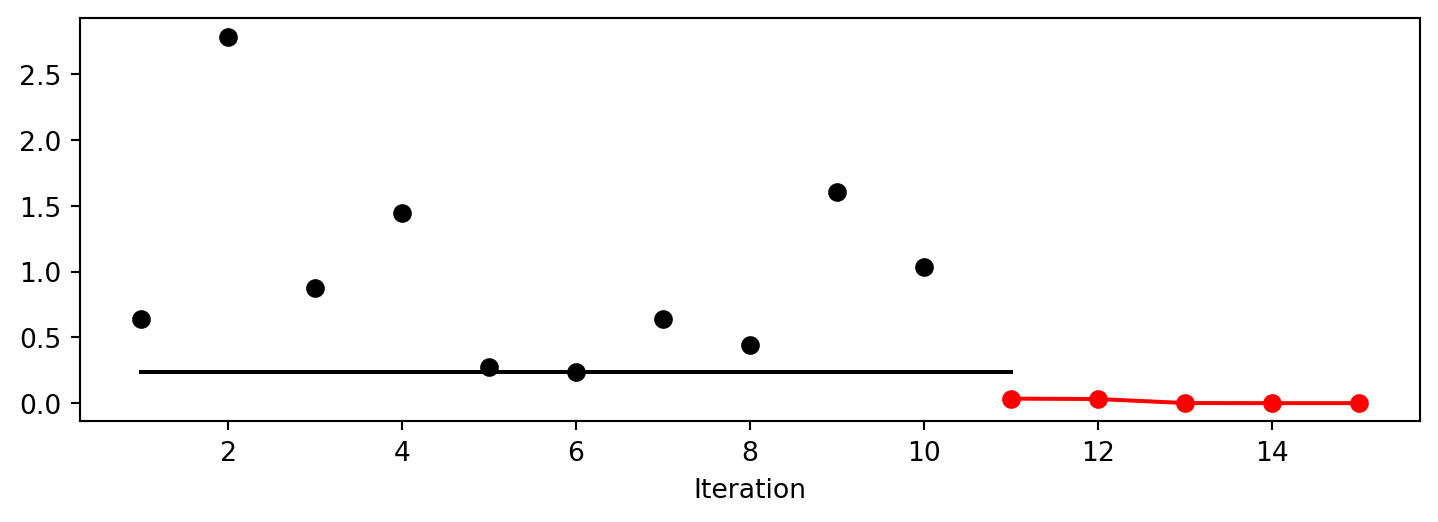

In [5]:
spot_3.plot_progress()

### A Contour Plot

We can select two dimensions, say $i=0$ and $j=1$, and generate a contour plot as follows.

::: {.callout-note}
#### Note: 

We have specified identical `min_z` and `max_z` values to generate comparable plots.

:::


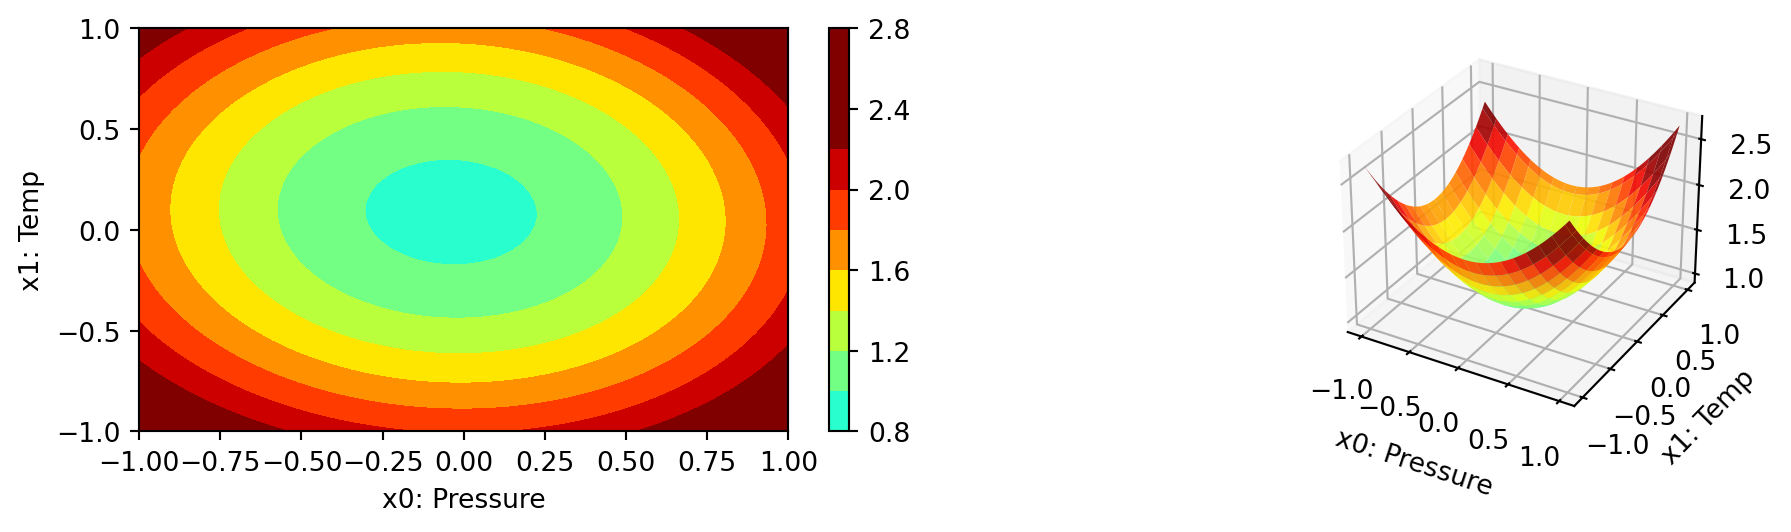

In [6]:
spot_3.plot_contour(i=0, j=1, min_z=0, max_z=2.25)

* In a similar manner, we can plot dimension $i=0$ and $j=2$:


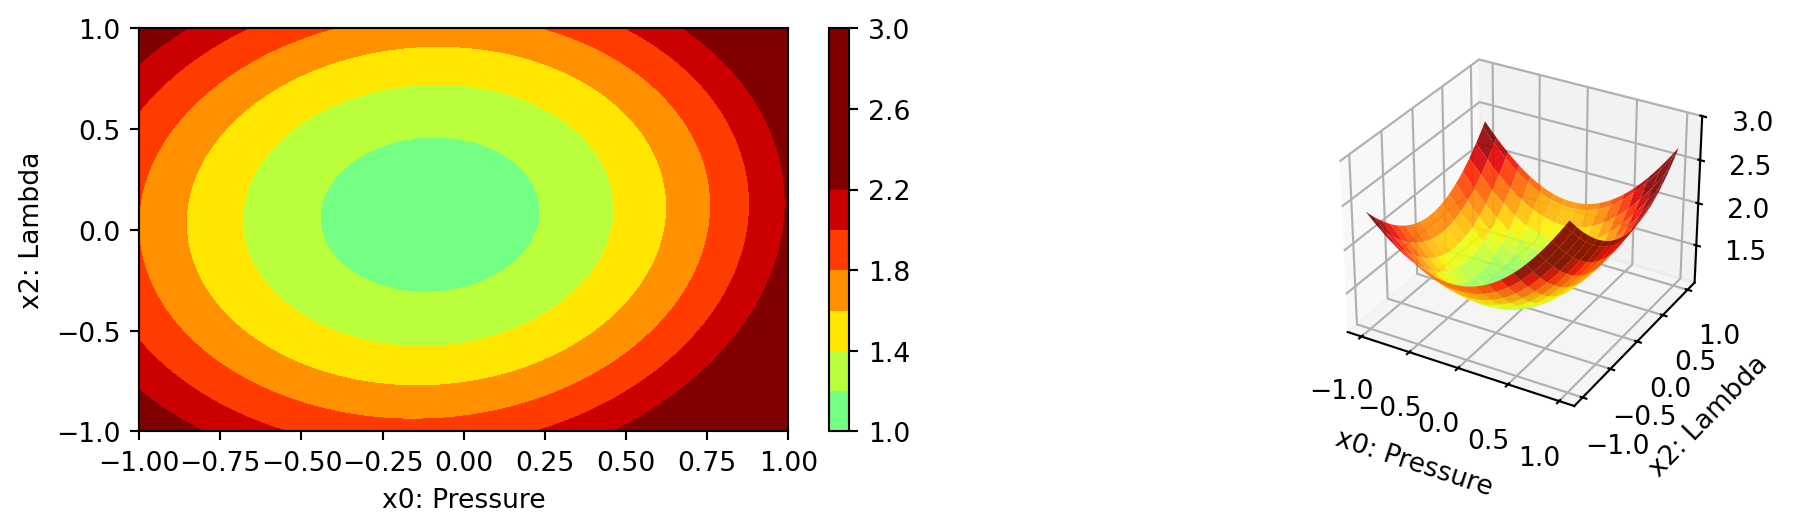

In [7]:
spot_3.plot_contour(i=0, j=2, min_z=0, max_z=2.25)

* The final combination is $i=1$ and $j=2$:


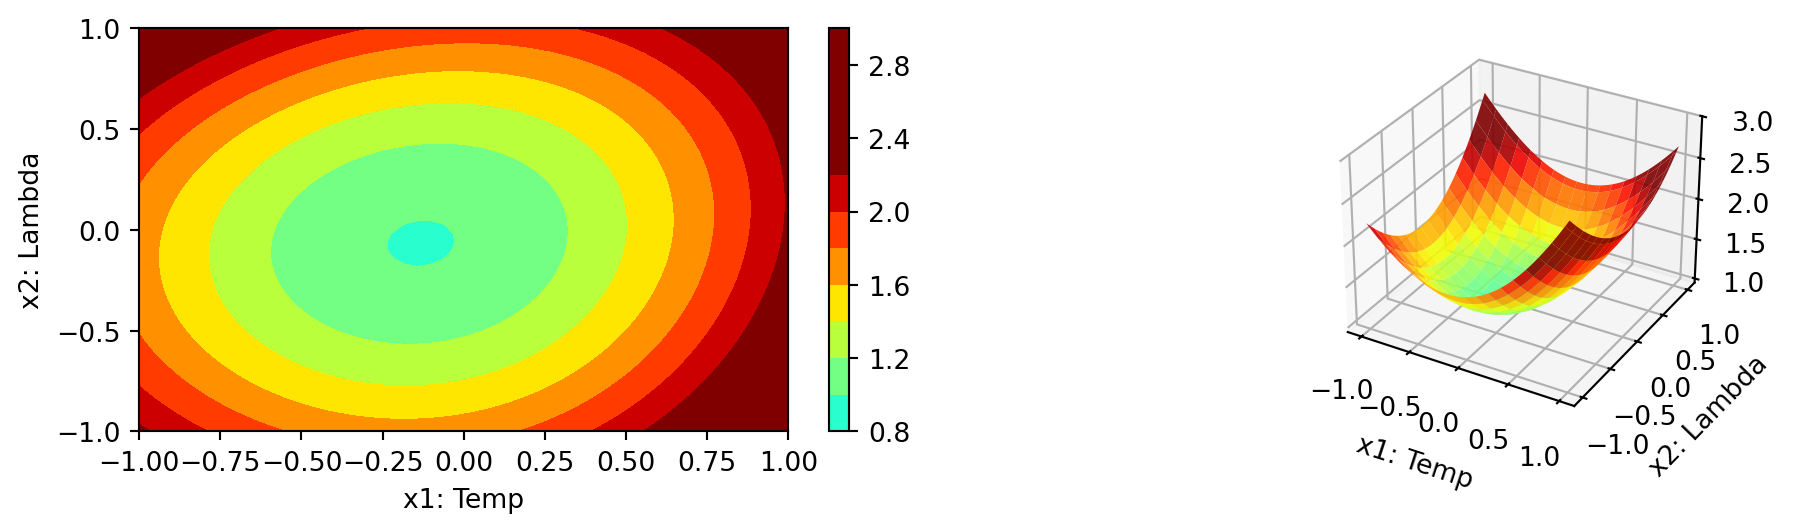

In [8]:
spot_3.plot_contour(i=1, j=2, min_z=0, max_z=2.25)

* The three plots look very similar, because the `fun_sphere` is symmetric.
* This can also be seen from the variable importance:


In [9]:
_ = spot_3.print_importance()

Pressure:  95.16050385357518
Temp:  100.0
Lambda:  86.66610935794161


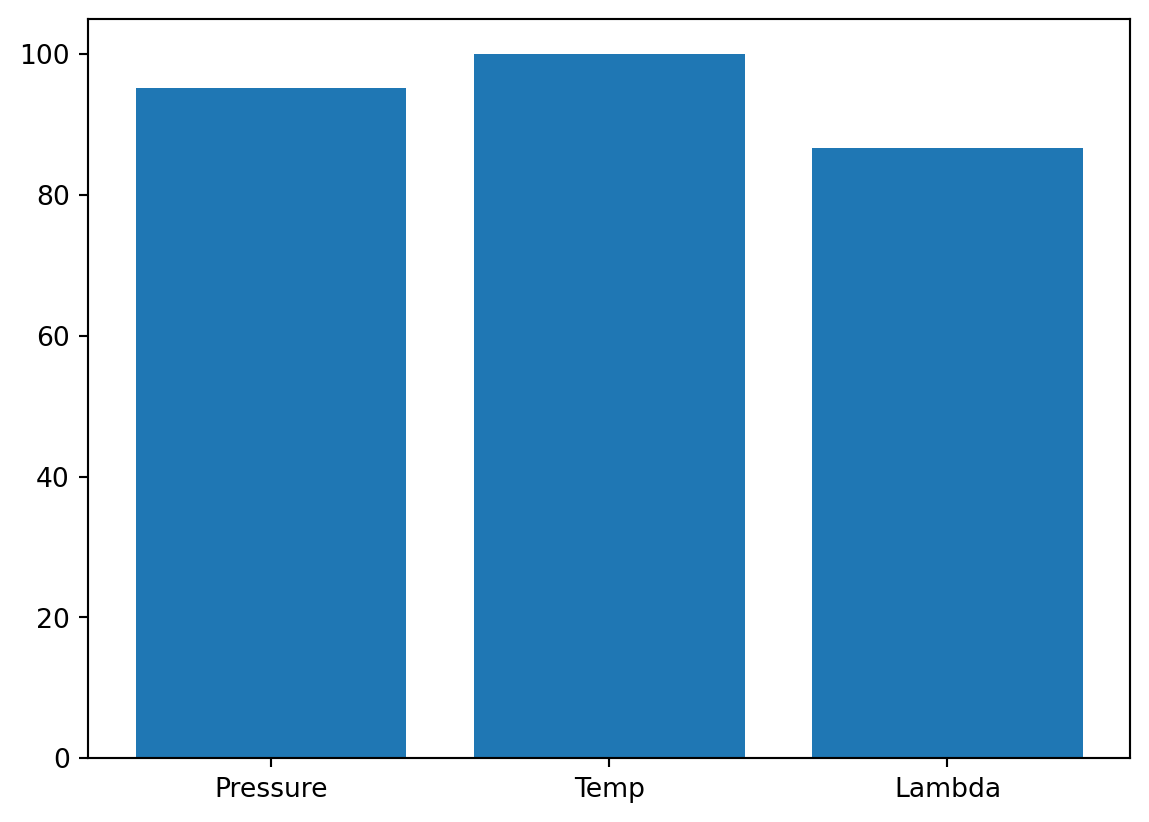

In [10]:
spot_3.plot_importance()

### TensorBoard

![TensorBoard visualization of the spotpython process. Objective function values plotted against wall time.](figures_static/02_tensorboard_01.png)

The second TensorBoard visualization shows the input values, i.e., $x_0, \ldots, x_2$, plotted against the wall time.
![TensorBoard visualization of the spotpython process.](figures_static/02_tensorboard_02.png)

The third TensorBoard plot illustrates how `spotpython` can be used as a microscope for the internal mechanisms of the surrogate-based optimization process. Here, one important parameter, the learning rate $\theta$ of the Kriging surrogate is plotted against the number of optimization steps.

![TensorBoard visualization of the spotpython surrogate model.](figures_static/02_tensorboard_03.png){width="100%"}


### Conclusion

Based on this quick analysis, we can conclude that all three dimensions are equally important (as expected, because the analytical function is known).

## Factorial Variables

Until now, we have considered continuous variables. However, in many applications, the variables are not continuous, but rather discrete or categorical. For example, the number of layers in a neural network, the number of trees in a random forest, or the type of kernel in a support vector machine are all discrete variables. In the following, we will consider a simple example with two numerical variables and one categorical variable.


In [11]:
from spotpython.design.spacefilling import SpaceFilling
from spotpython.build.kriging import Kriging
from spotpython.fun.objectivefunctions import analytical
import numpy as np

First, we generate the test data set for fitting the Kriging model. We use the `SpaceFilling` class to generate the first two diemnsion of $n=30$ design points.
The third dimension is a categorical variable, which can take the values $0$, $1$, or $2$.

In [12]:
gen = SpaceFilling(2)
n = 30
rng = np.random.RandomState(1)
lower = np.array([-5,-0])
upper = np.array([10,15])
fun_orig = analytical().fun_branin
fun = analytical().fun_branin_factor

X0 = gen.scipy_lhd(n, lower=lower, upper = upper)
X1 = np.random.randint(low=0, high=3, size=(n,))
X = np.c_[X0, X1]
print(X[:5,:])

[[-2.84117593  5.97308949  2.        ]
 [-3.61017994  6.90781409  1.        ]
 [ 9.91204705  5.09395275  2.        ]
 [-4.4616725   1.3617128   2.        ]
 [-2.40987728  8.05505365  0.        ]]


The objective function is the `fun_branin_factor` in the `analytical` class [[SOURCE]](https://sequential-parameter-optimization.github.io/spotpython/reference/spotpython/fun/objectivefunctions/#spotpython.fun.objectivefunctions.analytical.fun_branin_factor).
It calculates the Branin function of $(x_1, x_2)$ with an additional factor based on the value of $x_3$. If $x_3 = 1$, the value of the Branin function is increased by 10. If $x_3 = 2$, the value of the Branin function is decreased by 10. Otherwise, the value of the Branin function is not changed.


In [13]:
y = fun(X)
y_orig = fun_orig(X0)
data = np.c_[X, y_orig, y]
print(data[:5,:])

[[ -2.84117593   5.97308949   2.          32.09388125  22.09388125]
 [ -3.61017994   6.90781409   1.          43.965223    53.965223  ]
 [  9.91204705   5.09395275   2.           6.25588575  -3.74411425]
 [ -4.4616725    1.3617128    2.         212.41884106 202.41884106]
 [ -2.40987728   8.05505365   0.           9.25981051   9.25981051]]


We fit two Kriging models, one with three numerical variables and one with two numerical variables and one categorical variable. We then compare the predictions of the two models.


In [14]:
S = Kriging(name='kriging',  seed=123, log_level=50, n_theta=3, noise=False, var_type=["num", "num", "num"])
S.fit(X, y)
Sf = Kriging(name='kriging',  seed=123, log_level=50, n_theta=3, noise=False, var_type=["num", "num", "factor"])
Sf.fit(X, y)

We can now compare the predictions of the two models. We generate a new test data set and calculate the sum of the absolute differences between the predictions of the two models and the true values of the objective function.
If the categorical variable is important, the sum of the absolute differences should be smaller than if the categorical variable is not important.


In [15]:
n = 100
k = 100
y_true = np.zeros(n*k)
y_pred= np.zeros(n*k)
y_factor_pred= np.zeros(n*k)
for i in range(k):
  X0 = gen.scipy_lhd(n, lower=lower, upper = upper)
  X1 = np.random.randint(low=0, high=3, size=(n,))
  X = np.c_[X0, X1]
  a = i*n
  b = (i+1)*n
  y_true[a:b] = fun(X)
  y_pred[a:b] = S.predict(X)
  y_factor_pred[a:b] = Sf.predict(X)

In [16]:
import pandas as pd
df = pd.DataFrame({"y":y_true, "Prediction":y_pred, "Prediction_factor":y_factor_pred})
df.head()

,y,Prediction,Prediction_factor
0,6.684749,17.660408,8.981430
1,95.865258,90.509501,94.789595
2,49.811774,31.120556,50.354535
3,8.177150,5.917583,8.441051
4,10.968377,14.164812,4.820856


In [17]:
df.tail()

,y,Prediction,Prediction_factor
9995,73.620503,82.887200,73.604506
9996,76.187178,92.365607,76.894275
9997,29.494401,27.820944,29.928268
9998,15.390268,15.671179,3.957986
9999,26.261264,13.626484,25.011336


In [18]:
s=np.sum(np.abs(y_pred - y_true))
sf=np.sum(np.abs(y_factor_pred - y_true))
res = (sf - s)
print(res)

-93783.37196523952


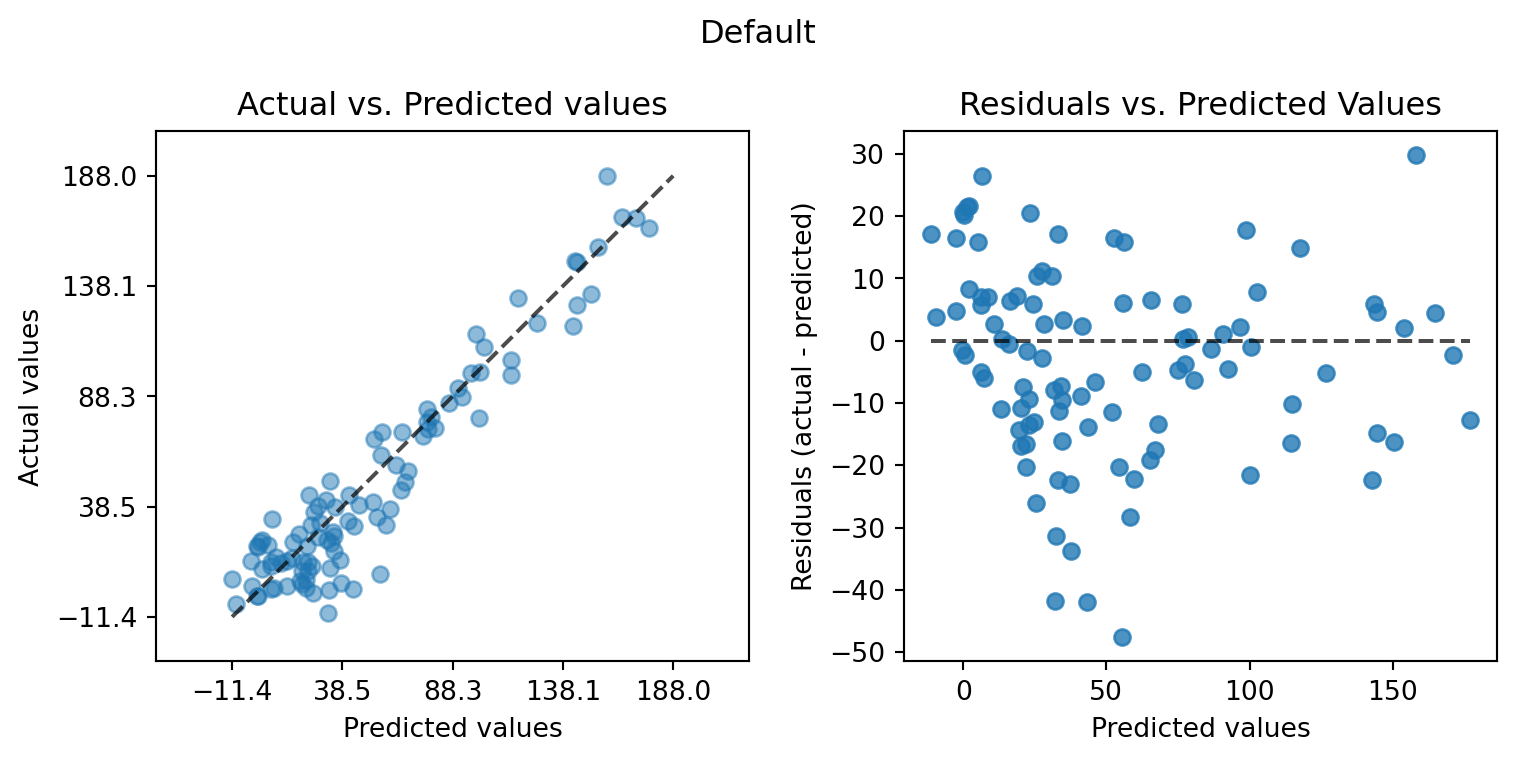

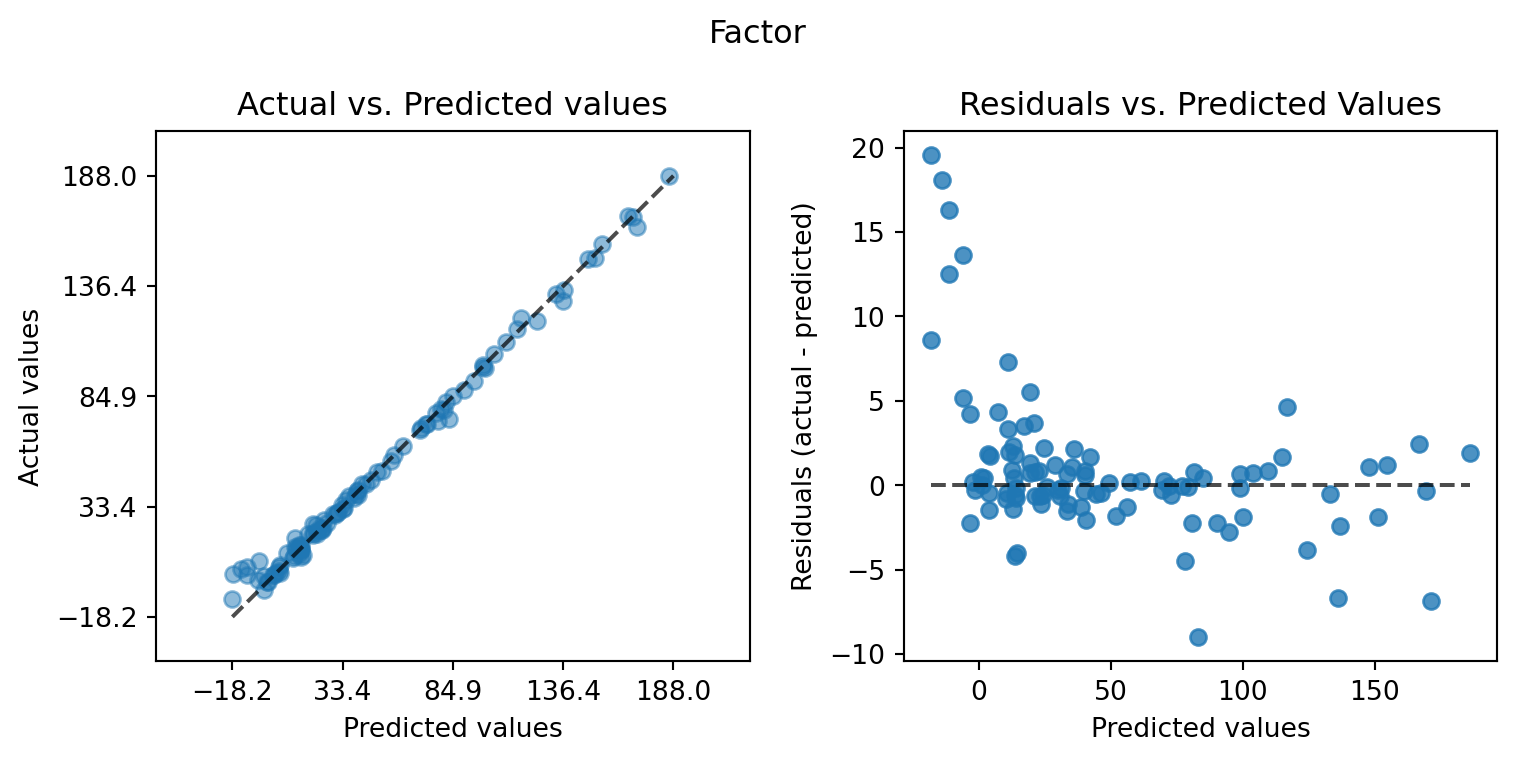

In [19]:
from spotpython.plot.validation import plot_actual_vs_predicted
plot_actual_vs_predicted(y_test=df["y"], y_pred=df["Prediction"], title="Default")
plot_actual_vs_predicted(y_test=df["y"], y_pred=df["Prediction_factor"], title="Factor")

## Exercises


### 1. The Three Dimensional `fun_cubed`

* The input dimension is `3`. The search range is  $-1 \leq x \leq 1$ for all dimensions.
* Generate contour plots
* Calculate the variable importance.
* Discuss the variable importance: 
  * Are all variables equally important? 
  * If not: 
    * Which is the most important variable?
    * Which is the least important variable?

### 2. The Ten Dimensional `fun_wing_wt`

* The input dimension is `10`. The search range is  $0 \leq x \leq 1$ for all dimensions.
* Calculate the variable importance.
* Discuss the variable importance: 
  * Are all variables equally important? 
  * If not: 
    * Which is the most important variable?
    * Which is the least important variable?
  * Generate contour plots for the three most important variables. Do they confirm your selection?

### 3. The Three Dimensional `fun_runge`

* The input dimension is `3`. The search range is  $-5 \leq x \leq 5$ for all dimensions.
* Generate contour plots
* Calculate the variable importance.
* Discuss the variable importance: 
  * Are all variables equally important? 
  * If not: 
    * Which is the most important variable?
    * Which is the least important variable?

### 4. The Three Dimensional `fun_linear`

* The input dimension is `3`. The search range is  $-5 \leq x \leq 5$ for all dimensions.
* Generate contour plots
* Calculate the variable importance.
* Discuss the variable importance: 
  * Are all variables equally important? 
  * If not: 
    * Which is the most important variable?
    * Which is the least important variable?

### 5. The Two Dimensional Rosenbrock Function `fun_rosen` {#sec-08-exer-rosenbrock}

* The input dimension is `2`. The search range is  $-5 \leq x \leq 10$ for all dimensions.
* See [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function) and [Rosenbrock Function](https://www.sfu.ca/~ssurjano/rosen.html) for details.
* Generate contour plots
* Calculate the variable importance.
* Discuss the variable importance: 
  * Are all variables equally important? 
  * If not: 
    * Which is the most important variable?
    * Which is the least important variable?


## Selected Solutions

### Solution to Exercise @sec-08-exer-rosenbrock: The Two-dimensional Rosenbrock Function `fun_rosen`


In [20]:
import numpy as np
from spotpython.fun.objectivefunctions import analytical
from spotpython.utils.init import fun_control_init, surrogate_control_init
from spotpython.spot import spot

#### The Objective Function: 2-dim fun_rosen

The `spotpython` package provides several classes of objective functions.
We will use the `fun_rosen` in the `analytical` class [[SOURCE]](https://github.com/sequential-parameter-optimization/spotpython/blob/main/src/spotpython/fun/objectivefunctions.py).


In [21]:
fun_rosen = analytical().fun_rosen

Here we will use problem dimension $k=2$, which can be specified by the `lower` bound arrays.
The size of the `lower` bound array determines the problem dimension. If we select `-5.0 * np.ones(2)`, a two-dimensional function is created.
In contrast to the one-dimensional case, where only one `theta` value is used, we will use $k$ different `theta` values (one for each dimension), i.e., we set `n_theta=3` in the `surrogate_control`.
The prefix is set to `"ROSEN"`. Again, TensorBoard can be used to monitor the progress of the optimization.


In [22]:
fun_control = fun_control_init(
              PREFIX="ROSEN",
              lower = -5.0*np.ones(2),
              upper = 10*np.ones(2),
              show_progress=True,
              fun_evals=25)
surrogate_control = surrogate_control_init(n_theta=2)
spot_rosen = spot.Spot(fun=fun_rosen,
                  fun_control=fun_control,
                  surrogate_control=surrogate_control)
spot_rosen.run()

Seed set to 123


spotpython tuning: 90.78805160669465 [####------] 44.00% 


spotpython tuning: 1.0171930962259077 [#####-----] 48.00% 


spotpython tuning: 1.0171930962259077 [#####-----] 52.00% 


spotpython tuning: 1.0171930962259077 [######----] 56.00% 


spotpython tuning: 1.0171930962259077 [######----] 60.00% 


spotpython tuning: 1.0171930962259077 [######----] 64.00% 


spotpython tuning: 1.0171930962259077 [#######---] 68.00% 


spotpython tuning: 0.9722891367911908 [#######---] 72.00% 


spotpython tuning: 0.9722891367911908 [########--] 76.00% 


spotpython tuning: 0.9722891367911908 [########--] 80.00% 


spotpython tuning: 0.9722891367911908 [########--] 84.00% 


spotpython tuning: 0.8058112323775151 [#########-] 88.00% 


spotpython tuning: 0.8058112323775151 [#########-] 92.00% 


spotpython tuning: 0.8058112323775151 [##########] 96.00% 


spotpython tuning: 0.726650609991151 [##########] 100.00% Done...



::: {.callout-note}
Now we can start TensorBoard in the background with the following command:


```{raw}
tensorboard --logdir="./runs"
```

and can access the TensorBoard web server with the following URL:


```{raw}
http://localhost:6006/
```

::: 

#### Results


In [23]:
_ = spot_rosen.print_results()

min y: 0.726650609991151
x0: 0.17237438431069813
x1: 0.09427797327939783


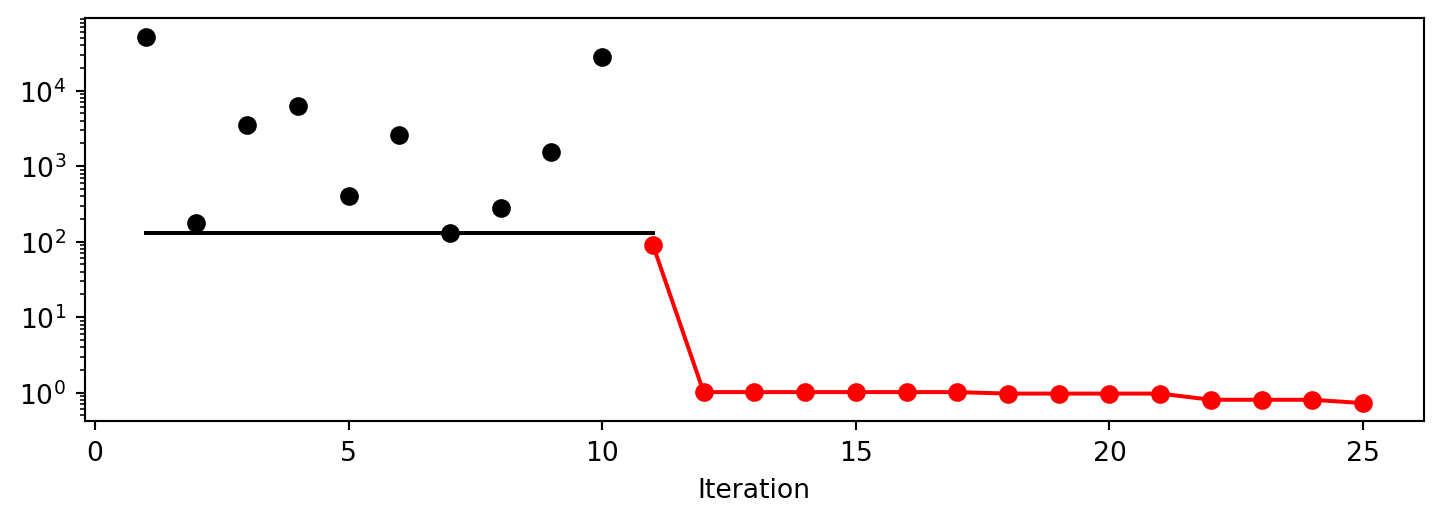

In [24]:
spot_rosen.plot_progress(log_y=True)

#### A Contour Plot

We can select two dimensions, say $i=0$ and $j=1$, and generate a contour plot as follows.

::: {.callout-note}
#### Note: 

For higher dimensions, it might be useful to have identical `min_z` and `max_z` values to generate comparable plots.
The default values are `min_z=None` and `max_z=None`, which will be replaced by the minimum and maximum values of the objective function.
:::


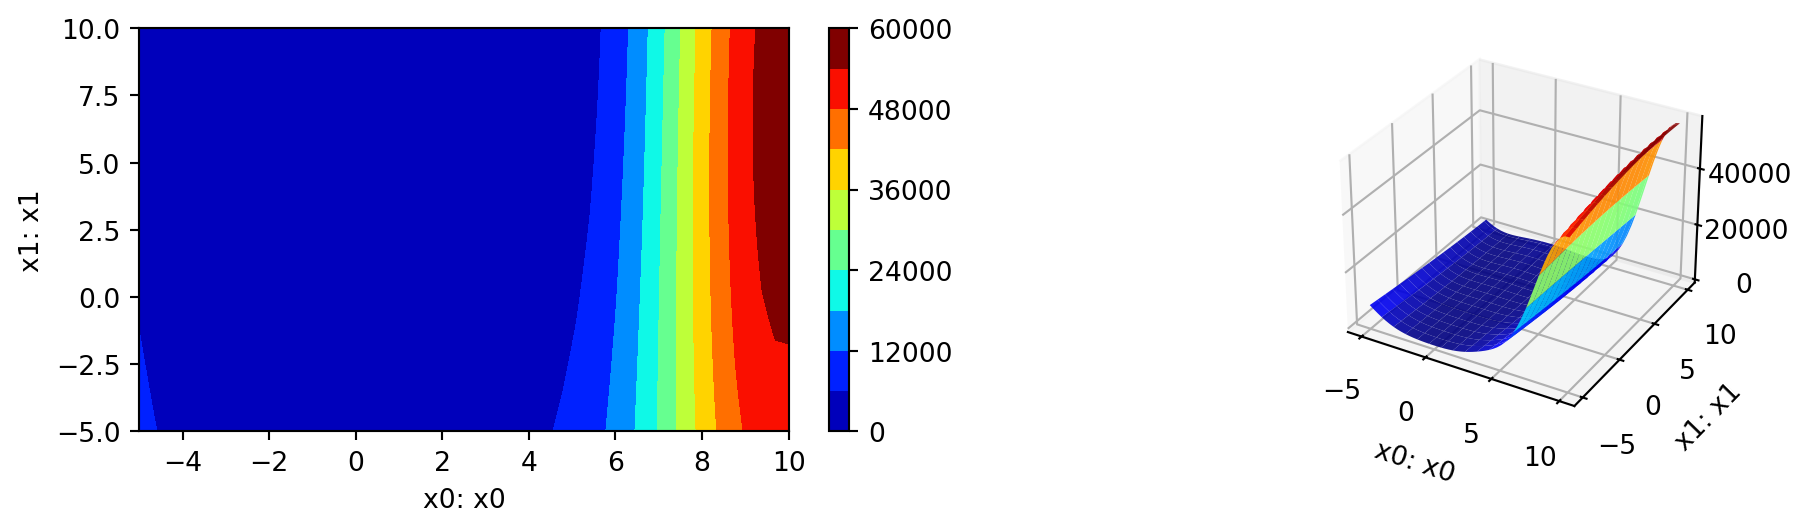

In [25]:
min_z = None
max_z = None
spot_rosen.plot_contour(i=0, j=1, min_z=min_z, max_z=max_z)

* The variable importance can be calculated as follows:


In [26]:
_ = spot_rosen.print_importance()

x0:  99.99999999999999
x1:  1.2430550048669098


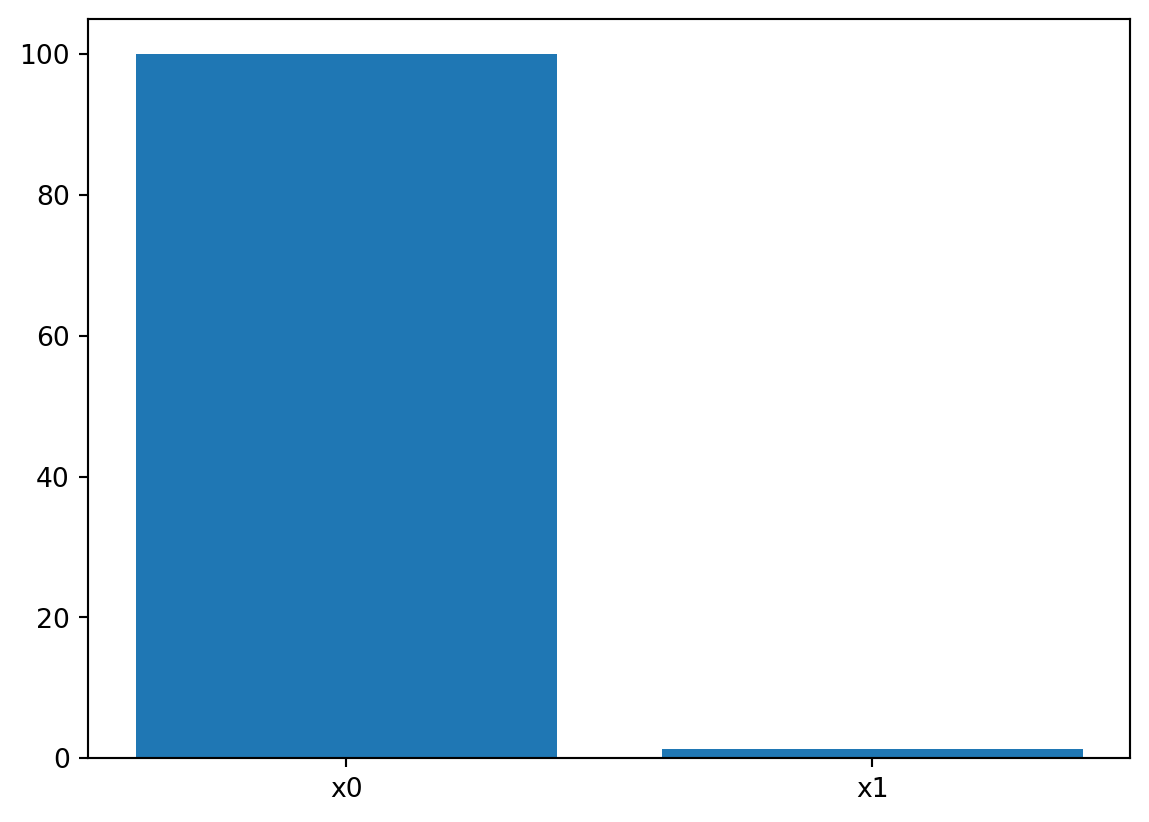

In [27]:
spot_rosen.plot_importance()

#### TensorBoard

TBD

## Jupyter Notebook

:::{.callout-note}

* The Jupyter-Notebook of this lecture is available on GitHub in the [Hyperparameter-Tuning-Cookbook Repository](https://github.com/sequential-parameter-optimization/Hyperparameter-Tuning-Cookbook/blob/main/008_num_spot_multidim.ipynb)

:::